In [0]:
#importing the dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
#importing the libraries
import numpy as np

In [0]:
#training images
mnist.train.images.shape[0]

55000

In [0]:
#testing images

mnist.train.images.shape[1]

784

In [0]:
#checking the local hardware runnuing platform 
print(mnist.test.images.shape[0], mnist.test.images.shape[1])

10000 784


In [0]:

from tensorflow.python.client import device_lib

In [0]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17540306913691629006
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 7630646428797753365
physical_device_desc: "device: XLA_CPU device"
]


In [0]:
#importing the essential libraries
import tensorflow as tf

In [0]:
# putting the inputs in placeholeder # 784 is the (28*28)pixel
x = tf.placeholder(tf.float32, [None, 784])


In [0]:
#declaring the weights and biases

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# We then add b, and finally apply tf.nn.softmax.
#y is the predicted

#i'm fitting w and b in the y pred
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [0]:
#y_ is the actual 
y_ = tf.placeholder(tf.float32, [None, 10])


In [0]:
# cross_entropy for getting the log loss
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [0]:
cross_entropy

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [0]:
# which optimizer to choose? to minimize the log loss
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)


Instructions for updating:
Use tf.cast instead.


In [0]:
#model starts here.......................enjoy it

sess = tf.InteractiveSession()

In [0]:
#all the above variable started running


tf.global_variables_initializer().run()

In [0]:
#interation to train = 1000 and feed it back to train again
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
    
    
   

In [0]:
# accuracy 

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9029


In [0]:
# plotting the train and test:


import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
def plt_dynamic(x, y, y_1, ax, colors=['b']):
    ax.plot(x, y, 'b', label="Train Loss")
    ax.plot(x, y_1, 'r', label="Test Loss")
    if len(x)==1:
        plt.legend()
    fig.canvas.draw()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Accuracy: 0.9017


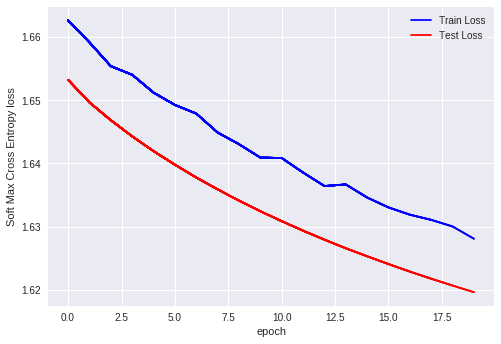

In [0]:
# summarizing everything in single cell
training_epochs = 20
batch_size = 1000
display_step = 1
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
xs, ytrs, ytes = [], [], []
for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c = sess.run([train_step, cross_entropy], feed_dict={x: batch_xs, y_: batch_ys})
            train_avg_cost += c / total_batch
            c = sess.run(cross_entropy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
            test_avg_cost += c / total_batch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax)
        

plt_dynamic(xs, ytrs, ytes, ax)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))